    # Задача 1. Кратчайшая кривая на поверхности $z = z(x, y)$


Найти кратчайшую кривую $y(x)$, соединяющую точки $A(x_0, y_0)$ и $B(x_1, y_1)$ на поверхности $z = z(x, y)$.

Функционал длины кривой:
$$
L[y] = \int_{x_0}^{x_1} \sqrt{1 + y'^2 + z_x^2 + z_y^2 y'^2 + 2 z_x z_y y'} \, dx
$$




Пример: поверхность $z = x + y$. Тогда $z_x = 1$, $z_y = 1$, и:
$$
L[y] = \sqrt{2}\int_{x_0}^{x_1} \sqrt{1 + y'^2 + y'} \, dx
$$
Применим уравнение Эйлера–Лагранжа:
$$
\frac{d}{dx}\left(\frac{\partial F}{\partial y'}\right) - \frac{\partial F}{\partial y} = 0.
$$

Здесь $\frac{\partial F}{\partial y} = 0$, так как $F$ не зависит от $y$, следовательно:
$$
\frac{d}{dx}\left(\frac{\partial F}{\partial y'}\right) = 0 \implies \frac{\partial F}{\partial y'} = \text{const}.
$$
Вычислим производную:
$$
\frac{\partial F}{\partial y'} = \frac{1}{2} \cdot \frac{2y' + 1}{\sqrt{1 + y'^2 + y'}} = C.
$$

Домножим на $2\sqrt{1 + y'^2} + y'$:
$$
2y' + 1 = 2C_1 \left(\sqrt{1 + y'^2} + y'\right).
$$

Возведём обе части в квадрат:
$$
(2y' + 1)^2 = 4C_1^2 \left(1 + y'^2 + y'\right).
$$

Раскроем скобки:
$$
4y'^2 + 4y' + 1 = 4C_1^2 (1 + y'^2 + y').
$$

Разделим обе части на 4:
$$
y'^2 + y' + \frac{1}{4} - C_1^2 (1 + y'^2 + y') = 0 => y' = const
$$

$$
y(x)=C_2x+C_3,
$$

Пусть:

$$
y(1)=1, y(2)=2.
$$

 **Подстановка граничных условий для $y(x)$:**

   \begin{cases}
   y(1) = C_1 \cdot 1 + C_2 = 1, \\
   y(2) = C_1 \cdot 2 + C_2 = 2.
   \end{cases}
 **Решение системы уравнений:**
   - Вычитаем первое уравнение из второго:
    $$
     (C_1 \cdot 2 + C_2) - (C_1 \cdot 1 + C_2) = 2 - 1 \implies C_1 = 1.
    $$
   - Подставляем $C_1 = 1$ в первое уравнение:
$$
     1 \cdot 1 + C_2 = 1 \implies C_2 = 0.
$$

 **Полученное решение для $y(x)$:**
$$
   y(x) = x.
$$

**Нахождение $z(x)$ через заданную поверхность  $z(x, y) = x + y$:**
$$
   z(x) = x + y(x) = x + x = 2x.
$$

 **Проверка граничных условий:**
   - Для $y(x)$:
$$
     y(1) = 1, \quad y(2) = 2 \quad.
$$
   - Для $z(x)$:
$$
     z(1) = 2, \quad z(2) = 4 \quad.
$$

**Итоговый ответ:**
   - Кратчайшая кривая:
$$
     y(x) = x, \quad z(x) = 2x.
$$
   - Это прямая на поверхности $z = x + y$, соединяющая точки $A(1, 1, 2)$ и $B(2, 2, 4)$.

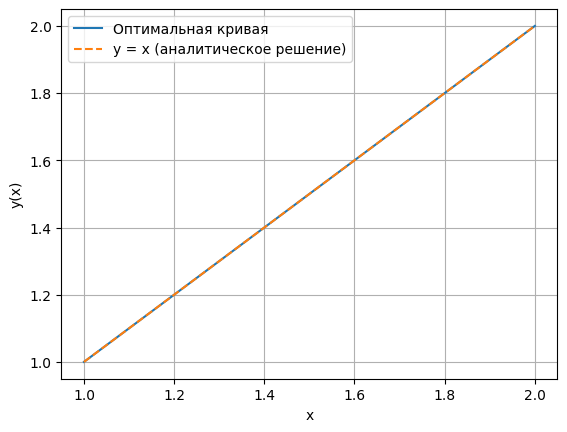

In [52]:
import numpy as np
import sympy as sp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import plotly.graph_objs as go

def analytic_solution(x):
    return x

x_sym, y_sym = sp.symbols('x y')
z_expr = x_sym + y_sym

z_func = sp.lambdify((x_sym, y_sym), z_expr, 'numpy')

z_x_expr = sp.diff(z_expr, x_sym)
z_y_expr = sp.diff(z_expr, y_sym)
z_x_func = sp.lambdify((x_sym, y_sym), z_x_expr, 'numpy')
z_y_func = sp.lambdify((x_sym, y_sym), z_y_expr, 'numpy')


def functional_length(y_vals, x_vals):
    dy_dx = np.gradient(y_vals, x_vals)
    z_x = z_x_func(x_vals, y_vals)
    z_y = z_y_func(x_vals, y_vals)
    integrand = np.sqrt(1 + dy_dx**2 + z_x**2 + z_y**2 * dy_dx**2 + 2 * z_x * z_y * dy_dx)
    return np.trapezoid(integrand, x_vals)

def objective(y):
        y[0], y[-1] = y0, y1
        return functional_length(y, x_vals)


def numerical_and_analitic_solution(points, N):
    global x0, y0, y1, x1, x_vals
    x0, y0 = points[0]
    x1, y1 = points[1]
    x_vals = np.linspace(x0, x1, N)
    initial_guess = np.linspace(y0, y1, N)

    result = minimize(objective, initial_guess, method='L-BFGS-B')
    y_opt = result.x


    plt.plot(x_vals, y_opt, label='Оптимальная кривая')
    plt.plot(x_vals, analytic_solution(x_vals), '--', label='y = x (аналитическое решение)')
    plt.xlabel('x'); plt.ylabel('y(x)')
    plt.legend()
    plt.grid()
    plt.show()

numerical_and_analitic_solution([(1, 1), (2, 2)], 100)


In [53]:
def plot_3d_surface_with_curves_plotly(points, N):
    x0, y0 = points[0]
    x1, y1 = points[1]

    x_vals = np.linspace(x0, x1, N)
    initial_guess = np.linspace(y0, y1, N)


    result = minimize(objective, initial_guess, method='L-BFGS-B')
    y_opt = result.x
    z_opt = z_func(x_vals, y_opt)


    X, Y = np.meshgrid(np.linspace(x0, x1, 200), np.linspace(min(y0, y1), max(y0, y1), 200))
    Z = z_func(X, Y)


    surface = go.Surface(x=X, y=Y, z=Z, colorscale='Viridis', opacity=0.7)


    curve = go.Scatter3d(
        x=x_vals,
        y=y_opt,
        z=z_opt,
        mode='lines',
        line=dict(color='red', width=5),
        name='Численное решение'
    )

    layout = go.Layout(
        scene=dict(
            xaxis_title='x',
            yaxis_title='y',
            zaxis_title='z',
            aspectratio=dict(x=1, y=1, z=1)
        )
    )

    fig = go.Figure(data=[surface, curve], layout=layout)
    fig.show()

plot_3d_surface_with_curves_plotly([(1, 1), (2, 2)], 100)

# Кратчайшая кривая на поверхности $z(x, y) = x^2 * y^2$

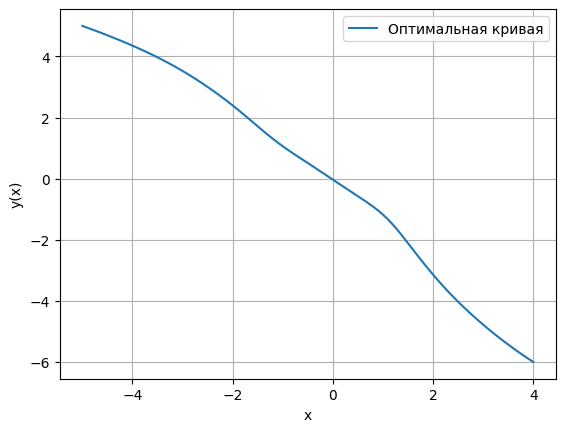

In [98]:
x_sym, y_sym = sp.symbols('x y')

z_expr = x_sym**2 * y_sym**2

z_func = sp.lambdify((x_sym, y_sym), z_expr, 'numpy')

z_x_expr = sp.diff(z_expr, x_sym)
z_y_expr = sp.diff(z_expr, y_sym)
z_x_func = sp.lambdify((x_sym, y_sym), z_x_expr, 'numpy')
z_y_func = sp.lambdify((x_sym, y_sym), z_y_expr, 'numpy')

def functional_length(y_vals, x_vals):
    dy_dx = np.gradient(y_vals, x_vals)
    z_x = z_x_func(x_vals, y_vals)
    z_y = z_y_func(x_vals, y_vals)
    integrand = np.sqrt(1 + dy_dx**2 + z_x**2 + z_y**2 * dy_dx**2 + 2 * z_x * z_y * dy_dx)
    return np.trapezoid(integrand, x_vals)

def objective(y):
        y[0], y[-1] = y0, y1
        return functional_length(y, x_vals)


def numerical_solution(points, N):
    global x0, y0, y1, x1, x_vals
    x0, y0 = points[0]
    x1, y1 = points[1]
    x_vals = np.linspace(x0, x1, N)
    initial_guess = np.linspace(y0, y1, N)

    result = minimize(objective, initial_guess, method='L-BFGS-B')
    y_opt = result.x


    plt.plot(x_vals, y_opt, label='Оптимальная кривая')
    plt.xlabel('x'); plt.ylabel('y(x)')
    plt.legend()
    plt.grid()
    plt.show()

numerical_solution([(-5, 5), (4, -6)], 100)

In [99]:
plot_3d_surface_with_curves_plotly([(-5, 5), (4, -6)], 100)

# Задача 2. Минимальная площадь под кривой на поверхности $z = z(x, y)$


Найти кривую $y(x)$, соединяющую точки $A(x_0, y_0)$ и $B(x_1, y_1)$, минимизирующую площадь под графиком на поверхности $z = z(x, y)$.

Функционал площади:
$$
S[y] = \int_{x_0}^{x_1} z(x, y(x)) \sqrt{1 + y'^2(x)} \, dx
$$



# Минимизация площади на поверхности z = x

## Функционал:
$$ S[y] = \int_{x_0}^{x_1} x\sqrt{1 + y'^2(x)} \, dx $$

## Функция Лагранжа:
$$ F(x,y') = x\sqrt{1 + y'^2} $$

## Уравнение Эйлера–Лагранжа (особый случай)

Поскольку $F$ не зависит явно от $y$, применим:
$$ \frac{\partial F}{\partial y'} = \text{const} = C $$

### Производная по $y'$:
$$ \frac{\partial F}{\partial y'} = \frac{x \cdot y'}{\sqrt{1 + y'^2}} = C $$

### Решение уравнения:
1. Возводим в квадрат:
$$ \frac{x^2 y'^2}{1 + y'^2} = C^2 $$
2. Умножаем на знаменатель:
$$ x^2 y'^2 = C^2 (1 + y'^2) $$
3. Собираем члены с $y'^2$:
$$ y'^2 (x^2 - C^2) = C^2 $$
4. Выражаем производную:
$$ y' = \pm \frac{C}{\sqrt{x^2 - C^2}} $$

Положим $C_1 = C^2$, тогда:
$$ y' = \pm \frac{\sqrt{C_1}}{\sqrt{x^2 - C_1}} $$

### Интегрирование:
$$ y(x) = \sqrt{C_1} \ln\left(x + \sqrt{x^2 - C_1}\right) + C_2 $$

## Граничные условия:
$$ \begin{cases}
y(1) = 1 \\
y(2) = 2
\end{cases} $$

Подставляем в уравнение:
$$ \begin{cases}
1 = \sqrt{C_1} \ln\left(1 + \sqrt{1 - C_1}\right) + C_2 \\
2 = \sqrt{C_1} \ln\left(2 + \sqrt{4 - C_1}\right) + C_2
\end{cases} $$

Вычитаем уравнения:
$$ 1 = \sqrt{C_1} \left[ \ln\left(2 + \sqrt{4 - C_1}\right) - \ln\left(1 + \sqrt{1 - C_1}\right) \right] $$

## Численное решение:
Уравнение для $C_1$:
$$ \sqrt{C_1} \ln\left(\frac{2 + \sqrt{4 - C_1}}{1 + \sqrt{1 - C_1}}\right) = 1 $$

$$ C_1 \approx 0.902478771951563 $$
$$ \sqrt{C_1} \approx 0.949462 $$

Вычисляем $C_2$:
$$ C_2 = 1 - 0.949462 \cdot \ln(1 + \sqrt{1 - 0.90248}) \approx 0.743 $$


## Подстановка в функционал

Исходный функционал площади:
$$
S[y] = \int_{1}^{2} x \sqrt{1 + y'^2} \, dx
$$

Подставляем найденное выражение для производной:
$$
y' = \frac{\sqrt{C_1}}{\sqrt{x^2 - C_1}} \implies 1 + y'^2 = 1 + \frac{C_1}{x^2 - C_1} = \frac{x^2}{x^2 - C_1}
$$

Таким образом, подынтегральное выражение преобразуется:
$$
x \sqrt{1 + y'^2} = x \cdot \sqrt{\frac{x^2}{x^2 - C_1}} = \frac{x^2}{\sqrt{x^2 - C_1}}
$$

Финальный вид функционала:
$$
S[y] = \int_{1}^{2} \frac{x^2}{\sqrt{x^2 - C_1}} \, dx
$$

где:
- $C_1 \approx 0.90248$ - найденная ранее константа
- Пределы интегрирования соответствуют граничным точкам $x_0=1$, $x_1=2$
$$
S[y] = \int_{1}^{2} \frac{x^2}{\sqrt{x^2 - C_1}} \, dx \approx 2.078
$$

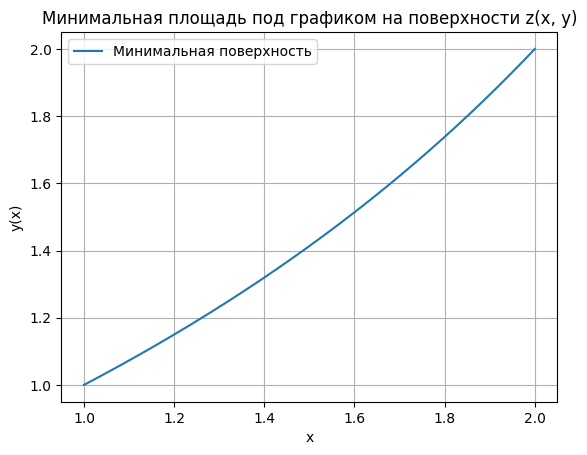

Минимальная площадь: 2.173158


In [5]:
from scipy.integrate import solve_bvp


def surface_z(x, y):
    return x


x0, y0 = 1.0, 1.0
x1, y1 = 2.0, 2.0


def ode_area(x, y):
    y_val, yp = y[0], y[1]
    z = surface_z(x, y_val)
    dz_dy = numerical_partial_y(surface_z, x, y_val)
    sqrt_expr = np.sqrt(1 + yp**2)

    dydx = yp
    d2ydx2 = (z * yp**2 - dz_dy * (1 + yp**2)) / (z * sqrt_expr)
    return np.vstack((dydx, d2ydx2))


def numerical_partial_y(f, x, y, h=1e-5):
    return (f(x, y + h) - f(x, y - h)) / (2 * h)

def bc(ya, yb):
    return np.array([ya[0] - y0, yb[0] - y1])
x = np.linspace(x0, x1, 200)
y_init = np.zeros((2, x.size))
y_init[0] = np.linspace(y0, y1, x.size)


sol = solve_bvp(ode_area, bc, x, y_init)

if sol.status != 0:
    print("Решение не найдено:", sol.message)
else:
    x_vals = sol.x
    y_vals = sol.y[0]
    yp_vals = sol.y[1]


    plt.plot(x_vals, y_vals, label='Минимальная поверхность')
    plt.xlabel("x")
    plt.ylabel("y(x)")
    plt.title("Минимальная площадь под графиком на поверхности z(x, y)")
    plt.grid()
    plt.legend()
    plt.show()


    z_vals = surface_z(x_vals, y_vals)
    integrand = z_vals * np.sqrt(1 + yp_vals**2)
    area = np.trapezoid(integrand, x_vals)
    print(f"Минимальная площадь: {area:.6f}")

# Минимизация площади на поверхности $z(x, y) = x^2 * y^2$

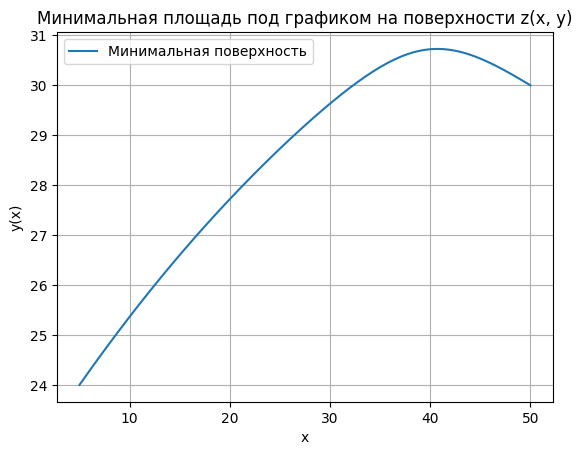

Минимальная площадь: 79347.878363


In [6]:

def surface_z(x, y):
    return x ** 2 + y ** 2


x0, y0 = 5.0, 24.0
x1, y1 = 50, 30

def ode_area(x, y):
    y_val, yp = y[0], y[1]
    z = surface_z(x, y_val)
    dz_dy = numerical_partial_y(surface_z, x, y_val)
    sqrt_expr = np.sqrt(1 + yp**2)

    dydx = yp
    d2ydx2 = (z * yp**2 - dz_dy * (1 + yp**2)) / (z * sqrt_expr)
    return np.vstack((dydx, d2ydx2))


def numerical_partial_y(f, x, y, h=1e-5):
    return (f(x, y + h) - f(x, y - h)) / (2 * h)

def bc(ya, yb):
    return np.array([ya[0] - y0, yb[0] - y1])
x = np.linspace(x0, x1, 200)
y_init = np.zeros((2, x.size))
y_init[0] = np.linspace(y0, y1, x.size)


sol = solve_bvp(ode_area, bc, x, y_init)

if sol.status != 0:
    print("Решение не найдено:", sol.message)
else:
    x_vals = sol.x
    y_vals = sol.y[0]
    yp_vals = sol.y[1]


    plt.plot(x_vals, y_vals, label='Минимальная поверхность')
    plt.xlabel("x")
    plt.ylabel("y(x)")
    plt.title("Минимальная площадь под графиком на поверхности z(x, y)")
    plt.grid()
    plt.legend()
    plt.show()


    z_vals = surface_z(x_vals, y_vals)
    integrand = z_vals * np.sqrt(1 + yp_vals**2)
    area = np.trapezoid(integrand, x_vals)
    print(f"Минимальная площадь: {area:.6f}")

In [7]:

def surface_z(x, y):
    return x**2 * y**2

x0, y0 = 5.0, 24.0
x1, y1 = 50, 30

def numerical_partial_y(f, x, y, h=1e-5):
    return (f(x, y + h) - f(x, y - h)) / (2 * h)

def ode_area(x, y):
    y_val, yp = y[0], y[1]
    z = surface_z(x, y_val)
    z = np.where(z == 0, 1e-8, z)
    dz_dy = numerical_partial_y(surface_z, x, y_val)
    sqrt_expr = np.sqrt(1 + yp**2)

    dydx = yp
    d2ydx2 = (z * yp**2 - dz_dy * (1 + yp**2)) / (z * sqrt_expr)
    return np.vstack((dydx, d2ydx2))

def bc(ya, yb):
    return np.array([ya[0] - y0, yb[0] - y1])

x = np.linspace(x0, x1, 200)
y_init = np.zeros((2, x.size))
y_init[0] = np.linspace(y0, y1, x.size)
sol = solve_bvp(ode_area, bc, x, y_init)

if sol.status != 0:
    print("Решение не найдено:", sol.message)
else:
    x_vals = sol.x
    y_vals = sol.y[0]

    # Сетка для поверхности
    X = np.linspace(x0 - 10, x1 + 10, 100)
    Y = np.linspace(0, y1 * 1.1, 100)
    XX, YY = np.meshgrid(X, Y)
    ZZ = surface_z(XX, YY)

    surface = go.Surface(
        x=XX, y=YY, z=ZZ,
        colorscale='Viridis',
        opacity=0.7,
        name='Поверхность z = x²y²',
        showscale=False
    )

    curve_z = surface_z(x_vals, y_vals)
    curve = go.Scatter3d(
        x=x_vals,
        y=y_vals,
        z=curve_z,
        mode='lines+markers',
        line=dict(color='red', width=5),
        marker=dict(size=6, color='red'),
        name='Минимальная кривая'
    )

    # Площадь под графиком — проекция на плоскость z=0
    x_fill = np.linspace(x0, x1, 100)
    y_interp = np.interp(x_fill, x_vals, y_vals)
    z_fill = surface_z(x_fill, y_interp)

    verts_x = np.concatenate([x_fill, x_fill])
    verts_y = np.concatenate([y_interp, y_interp])
    verts_z = np.concatenate([z_fill, np.zeros_like(z_fill)])

    triangles = []
    n = len(x_fill)
    for i in range(n - 1):
        top1, top2 = i, i + 1
        bot1, bot2 = i + n, i + 1 + n
        triangles.append([top1, top2, bot1])
        triangles.append([top2, bot2, bot1])
    triangles = np.array(triangles)

    area_mesh = go.Mesh3d(
        x=verts_x,
        y=verts_y,
        z=verts_z,
        i=triangles[:, 0],
        j=triangles[:, 1],
        k=triangles[:, 2],
        color='red',
        opacity=0.5,
        name='Площадь под графиком',
        hoverinfo='skip',
        showscale=False
    )

    fig = go.Figure(data=[surface, area_mesh, curve])

    z_max = max(ZZ.max(), curve_z.max())

    fig.update_layout(
        scene=dict(
            xaxis_title='x',
            yaxis_title='y',
            zaxis_title='z',
            xaxis=dict(nticks=10, range=[x0 - 20, x1 + 20]),
            yaxis=dict(nticks=10, range=[-10, y1 * 2]),
            zaxis=dict(nticks=10, range=[-10, z_max * 2]),
            aspectmode='manual',
            aspectratio=dict(x=3, y=1, z=1.5),
            camera=dict(
                eye=dict(x=3, y=2, z=1.5)
            )
        ),
        title='Минимальная площадь под графиком на поверхности z = x² y²',
        width=900,
        height=700,
    )

    fig.show()



# Задача 3. Минимизация площади при фиксированной длине кривой (условный экстремум)

# Метод Лагранжа для минимизации функционала с ограничением

## Исходный функционал
Функционал, который нужно минимизировать:
$$
J[y] = \int_{x_0}^{x_1} z(x,y(x)) \cdot \sqrt{1 + y'^2(x)} \, dx
$$

## Учёт ограничения на длину кривой
С учётом фиксированной длины кривой, добавляем ограничение с множителем Лагранжа $\lambda$:
$$
J[y] = \int_{x_0}^{x_1} (z(x,y(x)) + \lambda) \cdot \sqrt{1 + y'^2(x)} \, dx
$$

## Частный случай $z(x,y) = y$
$$
J[y] = \int_{x_0}^{x_1} (y(x) + \lambda) \cdot \sqrt{1 + y'^2(x)} \, dx
$$

Функция Лагранжа:
$$
H(y,y') = (y + \lambda)\sqrt{1 + y'^2}
$$

### Производные:
$$
\begin{aligned}
\frac{\partial H}{\partial y} &= \sqrt{1 + y'^2} \\
\frac{\partial H}{\partial y'} &= \frac{(y + \lambda)y'}{\sqrt{1 + y'^2}}
\end{aligned}
$$

## Уравнение Эйлера-Лагранжа
$$
\frac{d}{dx}\left(\frac{\partial H}{\partial y'}\right) - \frac{\partial H}{\partial y} = 0
$$

Подставляем производные:
$$
\frac{d}{dx}\left(\frac{(y + \lambda)y'}{\sqrt{1 + y'^2}}\right) = \sqrt{1 + y'^2}
$$

### Вычисление производной:
$$
\frac{d}{dx}\left(\frac{(y + \lambda)y'}{\sqrt{1 + y'^2}}\right) = \frac{y'^2}{\sqrt{1 + y'^2}} + \frac{(y + \lambda)y''}{(1 + y'^2)^{3/2}}
$$

### Подстановка в уравнение:
$$
\sqrt{1 + y'^2} = \frac{y'^2}{\sqrt{1 + y'^2}} + \frac{(y + \lambda)y''}{(1 + y'^2)^{3/2}}
$$

### Упрощение:
$$
1 + y'^2 = y'^2 + \frac{(y + \lambda)y''}{\sqrt{1 + y'^2}} \implies y'' = \frac{1 + y'^2}{y + \lambda}
$$

## Снижение порядка
Пусть $u = y'$, тогда $y'' = u \frac{du}{dy}$. Подставляем:
$$
u \frac{du}{dy} = \frac{1 + u^2}{y + \lambda}
$$

## Разделение переменных и интегрирование
$$
\frac{u \, du}{1 + u^2} = \frac{dy}{y + \lambda}
$$

Интегрируем обе части:

1. Левая часть:
$$
\int \frac{u \, du}{1 + u^2} = \frac{1}{2} \ln|1 + u^2| + C_1
$$

2. Правая часть:
$$
\int \frac{dy}{y + \lambda} = \ln|y + \lambda| + C_2
$$

Получаем:
$$
\frac{1}{2} \ln(1 + u^2) = \ln(y + \lambda) + C \implies \sqrt{1 + u^2} = C(y + \lambda) \implies y'^2 = C^2(y + \lambda)^2 - 1
$$

## Финальное интегрирование
$$
\frac{dy}{\sqrt{C^2(y + \lambda)^2 - 1}} = \pm dx
$$

Делаем замену $v = C(y + \lambda)$, $dy = \frac{dv}{C}$:
$$
\pm Cx = \int \frac{dv}{\sqrt{v^2 - 1}} = \ln\left|v + \sqrt{v^2 - 1}\right| + C_2
$$

Подставляем обратно $v = C(y + \lambda)$:
$$
\sqrt{C^2(y + \lambda)^2 - 1} + C(y + \lambda) = C_2 e^{\pm Cx}
$$

$$
y(x) = \frac{1}{2C}\left(C_2 e^{Cx} + \frac{e^{-Cx}}{C_2}\right) - \lambda
$$

# Определение констант $ C_1 $ и $ C_2 $ для граничных условий

Даны граничные условия:
- $ y(1) = 1 $
- $ y(2) = 2 $
- $ \lambda = 0.5 $

## Подстановка в общее решение

Общее решение:
$ y(x) = \frac{1}{2C_1}\left(C_2 e^{C_1 x} + \frac{e^{-C_1 x}}{C_2}\right) - \lambda $

### При $ x = 1 $:
$$
1 = \frac{C_2 e^{C_1}}{2C_1} + \frac{1}{2C_1 C_2 e^{C_1}} - 0.5
$$

### При $ x = 2 $:
$$
2 = \frac{C_2 e^{2C_1}}{2C_1} + \frac{1}{2C_1 C_2 e^{2C_1}} - 0.5
$$

## Численное решение системы

Получены значения:
$$
C_1 = -0.903032 \\
C_2 = -1.64351
$$

## Выражение $ y(x) + \lambda $

Подставляем константы:
$$
y(x) + \lambda = \frac{-1.64351 \cdot e^{-0.903032 x}}{2 \cdot (-0.903032)} + \frac{1}{2 \cdot (-0.903032) \cdot (-1.64351) \cdot e^{-0.903032 x}}
$$

Упрощаем:
$$
y(x) + \lambda \approx \frac{1.64351}{1.806064} e^{-0.903032 x} + \frac{1}{2.9696 \cdot e^{-0.903032 x}}
$$

## Производная $ y'(x) $

$$
y'(x) = \frac{-1.64351}{2} e^{-0.903032 x} + \frac{1}{2 \cdot (-1.64351)} e^{0.903032 x}
$$

Упрощаем:
$$
y'(x) \approx -0.821755 e^{-0.903032 x} - 0.304075 e^{0.903032 x}
$$

## Вычисление функционала $ J[y] $

$$
J[y] = \int_1^2 \left( \frac{1.64351}{1.806064} e^{-0.903032 x} + \frac{1}{2.9696 \cdot e^{-0.903032 x}} \right) \cdot \sqrt{1 + \left( -0.821755 e^{-0.903032 x} - 0.304075 e^{0.903032 x} \right)^2} \, dx
$$

$$
J[y] = \int_1^2 \left( \frac{1.64351}{1.806064} e^{-0.903032 x} + \frac{1}{2.9696 \cdot e^{-0.903032 x}} \right) \cdot \sqrt{1 + \left( -0.821755 e^{-0.903032 x} - 0.304075 e^{0.903032 x} \right)^2} \, dx \approx 2.7024
$$

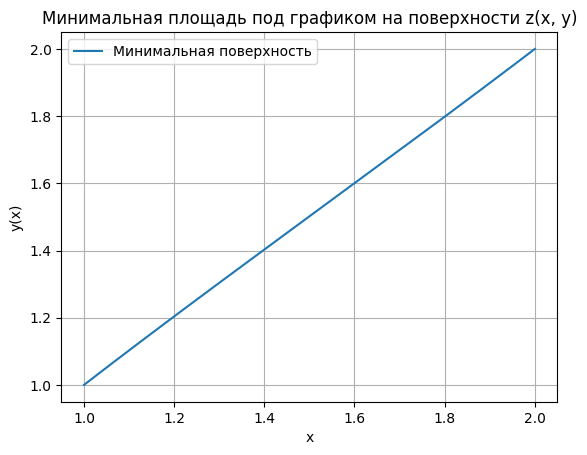

Минимальная площадь: 2.829240


In [100]:
from scipy.integrate import solve_bvp


def surface_z(x, y):
    return (y + 0.5)


x0, y0 = 1.0, 1.0
x1, y1 = 2.0, 2.0


def ode_area(x, y):
    y_val, yp = y[0], y[1]
    z = surface_z(x, y_val)
    dz_dy = numerical_partial_y(surface_z, x, y_val)
    sqrt_expr = np.sqrt(1 + yp**2)

    dydx = yp
    d2ydx2 = (z * yp**2 - dz_dy * (1 + yp**2)) / (z * sqrt_expr)
    return np.vstack((dydx, d2ydx2))


def numerical_partial_y(f, x, y, h=1e-5):
    return (f(x, y + h) - f(x, y - h)) / (2 * h)

def bc(ya, yb):
    return np.array([ya[0] - y0, yb[0] - y1])
x = np.linspace(x0, x1, 200)
y_init = np.zeros((2, x.size))
y_init[0] = np.linspace(y0, y1, x.size)


sol = solve_bvp(ode_area, bc, x, y_init)

if sol.status != 0:
    print("Решение не найдено:", sol.message)
else:
    x_vals = sol.x
    y_vals = sol.y[0]
    yp_vals = sol.y[1]


    plt.plot(x_vals, y_vals, label='Минимальная поверхность')
    plt.xlabel("x")
    plt.ylabel("y(x)")
    plt.title("Минимальная площадь под графиком на поверхности z(x, y)")
    plt.grid()
    plt.legend()
    plt.show()


    z_vals = surface_z(x_vals, y_vals)
    integrand = z_vals * np.sqrt(1 + yp_vals**2)
    area = np.trapezoid(integrand, x_vals)
    print(f"Минимальная площадь: {area:.6f}")

# Минимизация площади при фиксированной длине кривой (условный экстремум) $z(x, y) = x^2 * y^2$

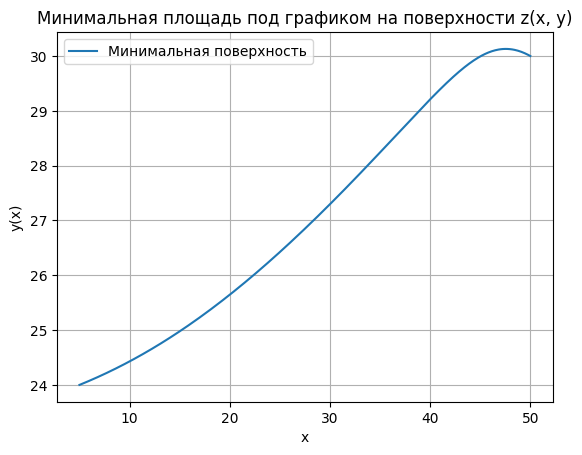

Минимальная площадь: 80043067.211707


In [46]:

def surface_z(x, y):
    return (x ** 2 * y ** 2  + 1000000)


x0, y0 = 5.0, 24.0
x1, y1 = 50, 30

def ode_area(x, y):
    y_val, yp = y[0], y[1]
    z = surface_z(x, y_val)
    dz_dy = numerical_partial_y(surface_z, x, y_val)
    sqrt_expr = np.sqrt(1 + yp**2)

    dydx = yp
    d2ydx2 = (z * yp**2 - dz_dy * (1 + yp**2)) / (z * sqrt_expr)
    return np.vstack((dydx, d2ydx2))


def numerical_partial_y(f, x, y, h=1e-5):
    return (f(x, y + h) - f(x, y - h)) / (2 * h)

def bc(ya, yb):
    return np.array([ya[0] - y0, yb[0] - y1])
x = np.linspace(x0, x1, 200)
y_init = np.zeros((2, x.size))
y_init[0] = np.linspace(y0, y1, x.size)


sol = solve_bvp(ode_area, bc, x, y_init)

if sol.status != 0:
    print("Решение не найдено:", sol.message)
else:
    x_vals = sol.x
    y_vals = sol.y[0]
    yp_vals = sol.y[1]


    plt.plot(x_vals, y_vals, label='Минимальная поверхность')
    plt.xlabel("x")
    plt.ylabel("y(x)")
    plt.title("Минимальная площадь под графиком на поверхности z(x, y)")
    plt.grid()
    plt.legend()
    plt.show()


    z_vals = surface_z(x_vals, y_vals)
    integrand = z_vals * np.sqrt(1 + yp_vals**2)
    area = np.trapezoid(integrand, x_vals)
    print(f"Минимальная площадь: {area:.6f}")

In [49]:
import numpy as np
from scipy.integrate import solve_bvp
import plotly.graph_objects as go

def surface_z(x, y):
    return (x**2 * y**2 + 1000000)

x0, y0 = 5.0, 24.0
x1, y1 = 50, 30

def numerical_partial_y(f, x, y, h=1e-5):
    return (f(x, y + h) - f(x, y - h)) / (2 * h)

def ode_area(x, y):
    y_val, yp = y[0], y[1]
    z = surface_z(x, y_val)
    dz_dy = numerical_partial_y(surface_z, x, y_val)
    sqrt_expr = np.sqrt(1 + yp**2)

    dydx = yp
    d2ydx2 = (z * yp**2 - dz_dy * (1 + yp**2)) / (z * sqrt_expr)
    return np.vstack((dydx, d2ydx2))

def bc(ya, yb):
    return np.array([ya[0] - y0, yb[0] - y1])
x = np.linspace(x0, x1, 200)
y_init = np.zeros((2, x.size))
y_init[0] = np.linspace(y0, y1, x.size)

sol = solve_bvp(ode_area, bc, x, y_init)

if sol.status != 0:
    print("Решение не найдено:", sol.message)
else:
    x_vals = sol.x
    y_vals = sol.y[0]


    X = np.linspace(x0 - 10, x1 + 10, 100)
    Y = np.linspace(min(y0, y1) - 10, max(y0, y1) + 10, 100)
    XX, YY = np.meshgrid(X, Y)
    ZZ = surface_z(XX, YY)

    surface = go.Surface(
        x=XX, y=YY, z=ZZ,
        colorscale='Viridis',
        opacity=0.7,
        name='Поверхность z = x²y² + 1000',
        showscale=False
    )

    curve_z = surface_z(x_vals, y_vals)
    curve = go.Scatter3d(
        x=x_vals,
        y=y_vals,
        z=curve_z,
        mode='lines+markers',
        line=dict(color='red', width=5),
        marker=dict(size=6, color='red'),
        name='Минимальная кривая'
    )

    # Площадь под графиком — проекция на плоскость z=0
    x_fill = np.linspace(x0, x1, 100)
    y_interp = np.interp(x_fill, x_vals, y_vals)
    z_fill = surface_z(x_fill, y_interp)

    verts_x = np.concatenate([x_fill, x_fill])
    verts_y = np.concatenate([y_interp, y_interp])
    verts_z = np.concatenate([z_fill, np.zeros_like(z_fill)])

    triangles = []
    n = len(x_fill)
    for i in range(n - 1):
        top1, top2 = i, i + 1
        bot1, bot2 = i + n, i + 1 + n
        triangles.append([top1, top2, bot1])
        triangles.append([top2, bot2, bot1])
    triangles = np.array(triangles)

    area_mesh = go.Mesh3d(
        x=verts_x,
        y=verts_y,
        z=verts_z,
        i=triangles[:, 0],
        j=triangles[:, 1],
        k=triangles[:, 2],
        color='red',
        opacity=0.3,
        name='Площадь под графиком',
        hoverinfo='skip',
        showscale=False
    )

    fig = go.Figure(data=[surface, area_mesh, curve])

    z_max = max(ZZ.max(), curve_z.max())

    fig.update_layout(
        scene=dict(
            xaxis_title='x',
            yaxis_title='y',
            zaxis_title='z',
            xaxis=dict(nticks=10, range=[x0 - 10, x1 + 10]),
            yaxis=dict(nticks=10, range=[min(y0, y1) - 10, max(y0, y1) + 10]),
            zaxis=dict(nticks=10, range=[0, z_max * 1.1]),
            aspectmode='manual',
            aspectratio=dict(x=2, y=1, z=1),
            camera=dict(
                eye=dict(x=1.5, y=1.5, z=1)
            )
        ),
        title='Минимальная площадь под графиком на поверхности z = x²y² + 10000',
        width=1000,
        height=800,
    )

    fig.show()